[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


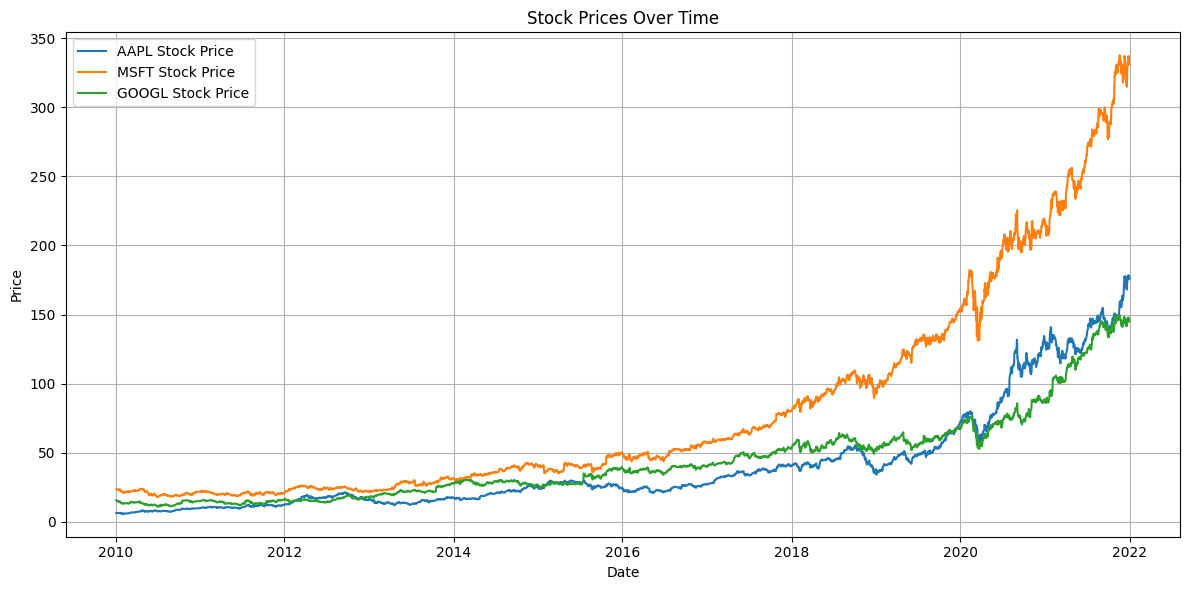

CAGR and Volatility Information:
CAGR for AAPL: 31.68%
CAGR for MSFT: 24.68%
CAGR for GOOGL: 20.37%
Average Volatility for AAPL: 28.05%
Average Volatility for MSFT: 25.06%
Average Volatility for GOOGL: 25.82%
Annual Dividend Yield for AAPL: 14.52%
Annual Dividend Yield for MSFT: 20.55%
Annual Dividend Yield for GOOGL: 0.00%


In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock tickers
tickers = ["AAPL", "MSFT", "GOOGL"]

# Set the date range
start_date = "2010-01-01"
end_date = "2022-01-01"

# Create a figure for the combined chart
fig, ax = plt.subplots(figsize=(12, 6))

# Create empty lists to store information about CAGR, volatility, and annual dividend yields
cagr_info = []
volatility_info = []
dividend_yield_info = []

# Fetch historical data for each ticker and calculate daily returns
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    df["Daily_Return"] = df["Adj Close"].pct_change()
    
    # Fetch dividend data
    dividends = yf.download(ticker, start=start_date, end=end_date, actions=True)['Dividends']
    
    # Calculate total returns (assuming dividends are reinvested) for each ticker
    total_returns = (df / df.iloc[0]).fillna(1.0)
    
    # Calculate CAGR for each ticker
    price_at_start = df["Adj Close"].iloc[0]  # Use .iloc[] for positional indexing
    price_at_end = df["Adj Close"].iloc[-1]  # Use .iloc[] for positional indexing
    num_years = len(df) / 252  # Assuming 252 trading days in a year
    cagr = (price_at_end / price_at_start) ** (1 / num_years) - 1
    cagr_info.append(f"CAGR for {ticker}: {cagr:.2%}")
    
    # Calculate average volatility for each ticker
    daily_volatility = df["Adj Close"].pct_change().std()
    average_volatility = daily_volatility * (252 ** 0.5)  # Annualize
    volatility_info.append(f"Average Volatility for {ticker}: {average_volatility:.2%}")
    
    # Calculate annual dividend yield for each ticker
    if not dividends.empty:
        avg_stock_price = (df["Adj Close"] + df["Adj Close"].shift(1)) / 2  # Average price over the year
        annual_dividend_yield = (dividends.sum() / avg_stock_price.mean()) * 100
        dividend_yield_info.append(f"Annual Dividend Yield for {ticker}: {annual_dividend_yield:.2f}%")
    
    # Plot the stock prices for each ticker on the same subplot
    ax.plot(df.index, df["Adj Close"], label=f"{ticker} Stock Price")

# Set common labels and legend
ax.set_title("Stock Prices Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.grid(True)
ax.legend()

# Show the combined plot
plt.tight_layout()
plt.show()

# Print information about CAGR, volatility, and annual dividend yields at the end
print("CAGR and Volatility Information:")
for info in cagr_info:
    print(info)
for info in volatility_info:
    print(info)
for info in dividend_yield_info:
    print(info)
